# 传统计算机视觉特征表达与处理

在本次的练习中，你将通过实际的一些操作，对计算机图像的存储和传统计算机视觉特征提取方法有一定的理解。

如果发现任何与本教程内容有关的错误或改进，请联系作者：acdoge.cao@gmail.com

参考资料：

- Jan Erik Solem 著. 朱文涛 / 袁勇 译. 《Python 计算机视觉编程》. 人民邮电出版社. 2014
- Richard Szeliski 著. 艾海舟 / 兴军亮 译. 《计算机视觉：算法与应用》. 清华大学出版社. 2012
- Rafael C. Gonzalez 著. 阮秋琦 译. 《数字图像处理（第三版）》. 电子工业出版社. 2011
- Robot Vision 著. 蒋欣兰 译. 《机器视觉》. 中国青年出版社. 2014

后面两本书相对前两本比较难，但更为全面和深入，有能力的情况下建议阅读英文原版。

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## PIL 与 Numpy 格式图片基本操作

PIL (Python Image Library) [[GitHub](https://github.com/python-pillow/Pillow)] [[Docs](https://pillow.readthedocs.io/en/latest/)] 是 Python 平台的图像处理标准库，兼具强大的功能和简洁的 API. 而 Pillow 是 PIL 的一个友好 Fork，提供了了广泛的文件格式支持，强大的图像处理能力，主要包括图像储存、图像显示、格式转换以及基本的图像处理等操作。如果安装了 Anaconda, 则 Pillow 就已经可用了。

我们以最经典的 Lenna 图为例(关于这张图片的故事可以访问[这个网页](http://www.lenna.org/))

![](./assets/lenna.jpg)

计算机中显示的图形一般可以分为两大类——位图(标量图)和矢量图，位图亦称为点阵图像或绘制图像，是由称作像素（图片元素）的单个点组成的。这些点可以进行不同的排列和染色以构成图样。当放大位图时，可以看见赖以构成整个图像的无数单个方块。扩大位图尺寸的效果是增大单个像素，从而使线条和形状显得参差不齐。然而，如果从稍远的位置观看它，位图图像的颜色和形状又显得是连续的。矢量图使用直线和曲线来描述图形，这些图形的元素是一些点、线、矩形、多边形、圆和弧线等等，它们都是通过数学公式计算获得的。在本节教程中，处理的都是位图。

**图片的读取**：现在我们尝试读取一张示范图片：

In [2]:
IMG_URL = "./assets/lenna.jpg"
img = Image.open(IMG_URL, 'r')
img.show()
# 此时应该弹窗显示图像

在 Notebook 中使用 PIL, 如果想要以内联的形式显示图像，则需要结合 `matplotlib.pyplot` : 

'RGB'

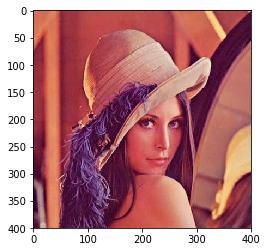

In [58]:
%matplotlib inline
plt.imshow(img) # 内联显示，不会弹窗，适合交互式环境
img.mode        # 显示图像的格式 RGB

**PIL 转 Numpy.** 我们可以将 PIL Image 图片转换为 Numpy 数组，方便后续的分析：

In [4]:
print(np.asarray(img)[:1])  # 先不在意输出的具体值
# 使用 np.array() 可以达到同样的效果
# 区别是 np.array() 是深拷贝，np.asarray() 是浅拷贝

[[[211 119 108]
  [209 117 106]
  [208 114 104]
  ...
  [232 130 108]
  [222 116  90]
  [191  83  55]]]


**图像格式转换**：图像的颜色转换可以使用 `convert()` 方法来实现。要读取一幅图像，并将其转换成
灰度图像，只需要加上 `convert('L')`, 如下所示：

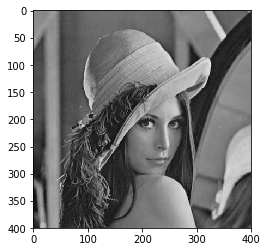

In [6]:
img_l = img.convert('L')
plt.imshow(img_l)

对于一张 RGB 图片，PIL 采用的灰度计算公式是：

$$
L = R \times 299/1000 + G \times 587/1000 + B \times 114/1000
$$

关于 `convert()` 的更多参数和使用方法，请查看[文档](https://pillow.readthedocs.io/en/latest/_modules/PIL/Image.html#Image.convert)。

**保存 PIL 图片**：直接调用 `Image` 类的 `save` 方法。

In [7]:
img.save('./assets/new_lenna.jpg')
# 在 assets 文件夹下应当出现新的名为 new_lenna.jpg 的图片

通过 `save()` 方法， PIL 可以将图像保存成多种格式的文件。PIL 的 `open()` 函数用于创建 PIL 图像对象， `save()` 方法用于保存图像到具有指定文件名的文件。除了后缀变为“.jpg”，上述代码的新文件名和原文件名相同。 PIL 是个足够智能的类库，可以根据文件扩展名来判定图像的格式。 PIL 函数会进行简单的检查，如果文件不是 JPEG 格式，会自动将其转换成 JPEG 格式；如果转换失败，它会在控制台输出一条报告失败的消息。

## 图片基础变换

PIL 图像可以进行多种基础操作，包括缩放大小、旋转角度等等，更多变换方式可以查阅[文档](https://pillow.readthedocs.io/en/latest/reference/Image.html)。

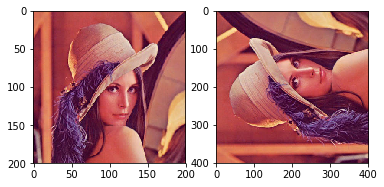

In [8]:
plt.subplot(1,2,1)
plt.imshow(img.resize((200, 200)))  # 缩放图像大小

plt.subplot(1,2,2)
plt.imshow(img.rotate(90))          # 旋转图像角度

## 图像特征表达

我们得到所使用 Lenna 图的分辨率，即长和宽的参数，并转换成对应的 Numpy 数组，我们很容易发现 `size` 是原来的三倍。这是因为这里不禁考虑了长和宽，还考虑了 RGB 三个颜色通道。通道(channel) 的概念在计算机视觉中经常遇到，我们在后续的课程中还会遇到它。

In [9]:
print(img.size)               # 图像的长和宽像素个数，即分辨率
img_np = np.asarray(img)      # 转化为 Numpy 数组
print(img_np.size)            # 两个 size 的含义不同
print(img_np.shape)           # 可以发现是 3 通道

(400, 400)
480000
(400, 400, 3)


我们在之前的练习中学习了切片语法以及 `axis` 原理，现在可以将三个通道分别表示出来。

Text(0.5, 0, 'blue channel')

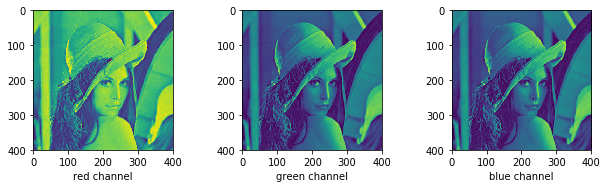

In [10]:
plt.figure(figsize=(10,10))                  # 调整子图大小
plt.subplots_adjust(wspace =0.5, hspace =0)  # 调整子图间距

plt.subplot(1,3,1)
plt.imshow(img_np[:, :, 0])  # 红色 Red
plt.xlabel('red channel')

plt.subplot(1,3,2)
plt.imshow(img_np[:, :, 1])  # 绿色 Green
plt.xlabel('green channel')

plt.subplot(1,3,3)
plt.imshow(img_np[:, :, 1])  # 蓝色 Blue
plt.xlabel('blue channel')

### 灰度直方图

通过成员函数的调用，在打开图像时就可以将其转换为灰度图。

PIL size: (400, 400)
Numpy size: 160000
Numpy shape: (400, 400)
Value range from 9 to 245


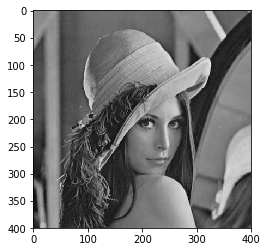

In [26]:
img_l = Image.open(IMG_URL).convert('L')
plt.imshow(img_l)
print('PIL size: ' + str(img_l.size))

img_l_np = np.asarray(img_l)                           # 转换成 Numpy 数组
print('Numpy size: ' + str(img_l_np.size))             # 此时变成了单通道图片
print('Numpy shape: ' + str(img_l_np.shape))           # 下面这一行找出颜色范围
print('Value range from ' + str(img_l_np.min()) + ' to ' + str(img_l_np.max()))

我们希望能用一种更加直观的形式，对图像中的颜色特征进行表示，比如灰度直方图。  
在此之前，我们先来看看一张直方图是如何使用 `hist()` 函数绘制的。

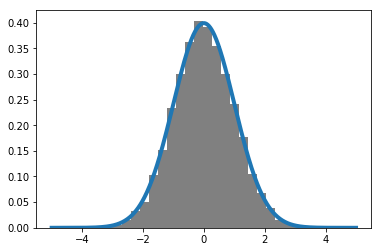

In [34]:
X = np.random.randn(10000)                         # 使用 random 类生成数目为 10000 的伪随机数
fig, ax = plt.subplots()                           # 创建一个绘制对象
ax.hist(X, bins=25, density=True, color = 'gray')  # 绘制灰度直方图
                                                   # 第一个参数是随机数序列，bins 指定直方的个数 
                                                   # density 指定是否进行归一化，color指定直方图的颜色
x = np.linspace(-5, 5, 1000)
ax.plot(x, 1 / np.sqrt(2*np.pi) *                  # 随机数据服从正态分布
        np.exp(-(x**2)/2), linewidth=4)            # 因此画出正态分布曲线进行比对
plt.show()

有了上面的经验，我们很自然地可以将作出一张图片的灰度直方图：

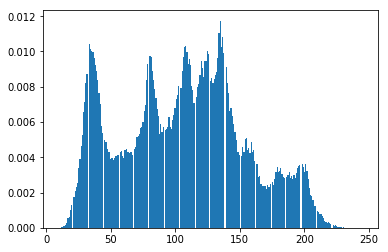

In [46]:
fig, ax = plt.subplots() 
pix = img_l_np.ravel()
ax.hist(pix, density=True, bins=256)   # ravel / flatten 将图像像素拉成一维数组
plt.show()                             # 横坐标是像素级范围 [0, 255]

### 颜色直方图

使用和灰度直方图同样的思路，我们可以得到一张图片的颜色直方图：

Text(0.5, 0, 'blue channel')

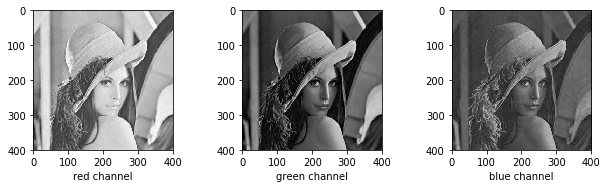

In [60]:
img = Image.open(IMG_URL)

# img_r = np.array(img)[:, :, 0]
# img_g = np.array(img)[:, :, 1]
# img_b = np.array(img)[:, :, 2]
# 实际上有着更加简单的语法

img_r, img_g, img_b = img.convert('RGB').split()

plt.figure(figsize=(10,10))                  # 调整子图大小
plt.subplots_adjust(wspace =0.5, hspace =0)  # 调整子图间距

plt.subplot(1,3,1)
plt.imshow(img_r)  # 红色 Red
plt.xlabel('red channel')

plt.subplot(1,3,2)
plt.imshow(img_g)  # 绿色 Green
plt.xlabel('green channel')

plt.subplot(1,3,3)
plt.imshow(img_b)  # 蓝色 Blue
plt.xlabel('blue channel')

这里出现一个有意思的情况，为什么调用函数和手动分离得到的 RGB 单通道的颜色不一样呢？  

这是因为单通道图总是以灰度的形式进行显示，你能想到其它的能让颜色正常显示的方法吗？